In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [0]:
# cargamos dataset
PATH = '/content/drive/My Drive/Master AI/Asignaturas/Mineria de Datos Preprocesamiento y Clasificacion/TrabajoFinal/'
datos_train = pd.read_csv(PATH + 'train.csv', sep=',') # datos sin labels
datos_test = pd.read_csv(PATH + 'test.csv', sep=',') # datos sin labels
labels = pd.read_csv(PATH + 'labels.csv', sep=',') # labels

In [0]:
# ahora agregamos la columna label a datos_train
datos_train = pd.merge(datos_train, labels, how = 'inner', on='id')

In [0]:
nombres = datos_train.columns # me guardo los nombres

In [0]:
# nos fijamos variables que se parezcan y que podamos eliminar
sum(datos_train.source == datos_train.source_type)/len(datos_train.source) # son iguales el 62%
sum(datos_train.waterpoint_type == datos_train.waterpoint_type_group)/len(datos_train) # son iguales el 89.7%
sum(datos_train.quantity == datos_train.quantity_group)/len(datos_train.source) # son iguales el 100%
sum(datos_train.payment == datos_train.payment_type)/len(datos_train.source) # son iguales el 58%
sum(datos_train.extraction_type == datos_train.extraction_type_class)/len(datos_train.source) # son iguales el 63%
sum(datos_train.extraction_type == datos_train.extraction_type_group)/len(datos_train.source) # son iguales el 95%
sum(datos_train.scheme_name == datos_train.scheme_management)/len(datos_train.source) # son iguales el 0%

0.05341750841750842

In [0]:
# cargamos las variables que generamos con el codigo de toni en R
working_years_train = pd.read_csv(PATH + 'variables_retocadas/working_years_train.csv')
working_years_test = pd.read_csv(PATH + 'variables_retocadas/working_years_test.csv')

In [0]:
# asignamos las nuevas variables
datos_train['working_years'] = working_years_train.x
datos_test['working_years'] = working_years_test.x

In [0]:
len(datos_test)

14850

In [0]:
# ahora abro los CSV y hago el merge de las variables del clustering hecho por Migue
# clusterings_train = pd.read_csv(PATH + 'agrupaciones_geograficas.csv')
# clusterings_test = pd.read_csv(PATH + 'agrupaciones_geograficas_test.csv')

In [0]:
# le agregamos el indice
# clusterings_train['id'] = datos_train.id
# clusterings_test['id'] = datos_test.id

In [0]:
# hacemos los merge por la longitud
# datos_train = pd.merge(datos_train, clusterings_train, how = 'inner', on=['id'])
# datos_test = pd.merge(datos_test, clusterings_test, how = 'inner', on=['id'])

In [0]:
len(datos_train)

59400

In [0]:
datos_test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,population,scheme_management,construction_year,extraction_type,extraction_type_class,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,working_years
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Internal,Magoma,Manyara,21,3,Mbulu,321,Parastatal,2012,other,other,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,other,8
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,300,VWC,2000,gravity,gravity,never pay,soft,good,insufficient,spring,spring,groundwater,communal standpipe,20
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Internal,Msatu,Singida,13,2,Singida Rural,500,VWC,2010,other,other,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,other,10
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,250,VWC,1987,other,other,unknown,soft,good,dry,shallow well,shallow well,groundwater,other,33
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,60,Water Board,2000,gravity,gravity,monthly,soft,good,enough,spring,spring,groundwater,communal standpipe,20


In [0]:
datos_train.drop(['waterpoint_type_group', 'extraction_type_group', 'quantity_group', 'recorded_by', 'scheme_name', 'num_private', 
                            'wpt_name', 'payment', 'ward', 'public_meeting', 'permit'], axis=1, inplace=True)

datos_test.drop(['waterpoint_type_group', 'extraction_type_group', 'quantity_group', 'recorded_by', 'scheme_name', 'num_private', 
                            'wpt_name', 'payment', 'ward', 'public_meeting', 'permit'], axis=1, inplace=True)
# estas variables las saco porque se repite, todavía no le hice un preprocesamiento y tienen muchos missing values o porque son irrelevantes

In [0]:

datos_train.shape

(59400, 28)

In [0]:
datos_test.shape

(14850, 27)

In [0]:
datos_train.management_group.value_counts()

In [0]:
datos_train.funder.value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Rotary Club Kitchener        1
Rodri                        1
Scharnhorstgymnasium         1
Norad/rudep                  1
Ma                           1
Name: funder, Length: 1897, dtype: int64

In [0]:
datos_test.funder.value_counts()

Government Of Tanzania    2215
Danida                     793
Hesawa                     580
World Bank                 352
Kkkt                       336
                          ... 
Dasap                        1
Local Government             1
Mwakipesile                  1
Dolf Project                 1
Panone                       1
Name: funder, Length: 980, dtype: int64

In [0]:
# con esta funcion arreglo funder a los cinco mas importantes y a los otros les pongo 'other'
def funder_wrangler(row):  
    '''Keep top 5 values and set the rest to 'other'''

    if row['funder']=='Government Of Tanzania':
        return 'gov'
    elif row['funder']=='Danida':
        return 'danida'
    elif row['funder']=='Hesawa':
        return 'hesawa'
    elif row['funder']=='Rwssp':
        return 'rwssp'
    elif row['funder']=='World Bank':
        return 'world_bank'    
    else:
        return 'other'
    
datos_train['funder'] = datos_train.apply(lambda row: funder_wrangler(row), axis=1)
datos_test['funder'] = datos_test.apply(lambda row: funder_wrangler(row), axis=1)

In [0]:
# hacemos lo mismo con 'installer'
datos_train.installer.value_counts()

DWE                           17402
Government                     1825
RWE                            1206
Commu                          1060
DANIDA                         1050
                              ...  
Wamissionari wa kikatoriki        1
Mzee Salum Bakari Darus           1
Recoda                            1
Hery                              1
Hasnein Murij                     1
Name: installer, Length: 2145, dtype: int64

In [0]:
def installer_wrangler(row):
    '''Keep top 5 values and set the rest to 'other'''
    if row['installer']=='DWE':
        return 'dwe'
    elif row['installer']=='Government':
        return 'gov'
    elif row['installer']=='RWE':
        return 'rwe'
    elif row['installer']=='Commu':
        return 'commu'
    elif row['installer']=='DANIDA':
        return 'danida'
    else:
        return 'other'  

datos_train['installer'] = datos_train.apply(lambda row: installer_wrangler(row), axis=1)

datos_test['installer'] = datos_test.apply(lambda row: installer_wrangler(row), axis=1)

In [0]:
# hacemos lo mismo con scheme_management
def scheme_wrangler(row):
    '''Keep top 5 values and set the rest to 'other'. '''
    if row['scheme_management']=='VWC':
        return 'vwc'
    elif row['scheme_management']=='WUG':
        return 'wug'
    elif row['scheme_management']=='Water authority':
        return 'wtr_auth'
    elif row['scheme_management']=='WUA':
        return 'wua'
    elif row['scheme_management']=='Water Board':
        return 'wtr_brd'
    else:
        return 'other'

datos_train['scheme_management'] = datos_train.apply(lambda row: scheme_wrangler(row), axis=1)
datos_test['scheme_management'] = datos_test.apply(lambda row: scheme_wrangler(row), axis=1)

In [0]:
# hacemos lo mismo con 'subvillage'
datos_train.subvillage.value_counts().head(50)

Madukani                508
Shuleni                 506
Majengo                 502
Kati                    373
Mtakuja                 262
Sokoni                  232
M                       187
Muungano                172
Mbuyuni                 164
Mlimani                 152
Songambele              147
Msikitini               134
Miembeni                134
1                       132
Kibaoni                 114
Kanisani                111
I                       109
Mapinduzi               109
Mjini                   108
Mjimwema                108
Mkwajuni                104
Mwenge                  102
Azimio                   98
Mabatini                 98
Mbugani                  95
Mission                  95
Bwawani                  91
Bondeni                  90
Chang'Ombe               88
Zahanati                 86
Mtaa Wa Kitunda Kati     84
Senta                    84
Kichangani               84
Misufini                 83
Center                   82
Nyerere             

In [0]:
# hacemos lo mismo con scheme_management
def subvillage_wrangler(row):
    '''Keep top 5 values and set the rest to 'other'. '''
    if row['subvillage']=='Madukani':
        return 'madukani'
    elif row['subvillage']=='Shuleni':
        return 'shuleni'
    elif row['subvillage']=='Majengo':
        return 'majengo'
    elif row['subvillage']=='Kati':
        return 'kati'
    elif row['subvillage']=='Mtakuja':
        return 'mtakuja'
    elif row['subvillage']=='Sokoni':
        return 'sokoni'
    elif row['subvillage']=='M':
        return 'm'
    elif row['subvillage']=='Muungano':
        return 'muungano'
    elif row['subvillage']=='Mbuyuni':
        return 'mbuyuni' 
    elif row['subvillage']=='Mlimani':
        return 'mlimani'        
    else:
        return 'other'

datos_train['subvillage'] = datos_train.apply(lambda row: subvillage_wrangler(row), axis=1)
datos_test['subvillage'] = datos_test.apply(lambda row: subvillage_wrangler(row), axis=1)

In [0]:
# arreglamos valores numéricos que tienen un cero (en este caso funciona como NA)
# pero antes los cambiamos por NaN para que funcione el metodo fillna, aca corregimos variables numéricas
datos_train['gps_height'].replace(0.0, np.nan, inplace=True)
datos_train['population'].replace(0.0, np.nan, inplace=True)
datos_train['amount_tsh'].replace(0.0, np.nan, inplace=True)
datos_train['longitude'].replace(0.0, np.nan, inplace=True)
datos_train['latitude'].replace(0.0, np.nan, inplace=True)
datos_train['construction_year'].replace(0.0, np.nan, inplace=True)

datos_train["gps_height"].fillna(datos_train.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
datos_train["gps_height"].fillna(datos_train.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
datos_train["gps_height"].fillna(datos_train["gps_height"].mean(), inplace=True)
datos_train["population"].fillna(datos_train.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
datos_train["population"].fillna(datos_train.groupby(['region'])["population"].transform("median"), inplace=True)
datos_train["population"].fillna(datos_train["population"].median(), inplace=True)
datos_train["amount_tsh"].fillna(datos_train.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
datos_train["amount_tsh"].fillna(datos_train.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
datos_train["amount_tsh"].fillna(datos_train["amount_tsh"].median(), inplace=True)
datos_train["latitude"].fillna(datos_train.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
datos_train["longitude"].fillna(datos_train.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
datos_train["longitude"].fillna(datos_train.groupby(['region'])["longitude"].transform("mean"), inplace=True)
datos_train["construction_year"].fillna(datos_train.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
datos_train["construction_year"].fillna(datos_train.groupby(['region'])["construction_year"].transform("median"), inplace=True)
datos_train["construction_year"].fillna(datos_train.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
datos_train["construction_year"].fillna(datos_train["construction_year"].median(), inplace=True)

In [0]:
datos_test['gps_height'].replace(0.0, np.nan, inplace=True)
datos_test['population'].replace(0.0, np.nan, inplace=True)
datos_test['amount_tsh'].replace(0.0, np.nan, inplace=True)
datos_test['longitude'].replace(0.0, np.nan, inplace=True)
datos_test['latitude'].replace(0.0, np.nan, inplace=True)
datos_test['construction_year'].replace(0.0, np.nan, inplace=True)

datos_test["gps_height"].fillna(datos_test.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
datos_test["gps_height"].fillna(datos_test.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
datos_test["gps_height"].fillna(datos_test["gps_height"].mean(), inplace=True)
datos_test["population"].fillna(datos_test.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
datos_test["population"].fillna(datos_test.groupby(['region'])["population"].transform("median"), inplace=True)
datos_test["population"].fillna(datos_test["population"].median(), inplace=True)
datos_test["amount_tsh"].fillna(datos_test.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
datos_test["amount_tsh"].fillna(datos_test.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
datos_test["amount_tsh"].fillna(datos_test["amount_tsh"].median(), inplace=True)
datos_test["latitude"].fillna(datos_test.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
datos_test["longitude"].fillna(datos_test.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
datos_test["longitude"].fillna(datos_test.groupby(['region'])["longitude"].transform("mean"), inplace=True)
datos_test["construction_year"].fillna(datos_test.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
datos_test["construction_year"].fillna(datos_test.groupby(['region'])["construction_year"].transform("median"), inplace=True)
datos_test["construction_year"].fillna(datos_test.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
datos_test["construction_year"].fillna(datos_test["construction_year"].median(), inplace=True)

In [0]:
# agrego nueva variable: años que lleva operandose
datos_train['date_recorded'] = pd.to_datetime(datos_train['date_recorded'])
datos_train['operational_year'] = datos_train.date_recorded.dt.year - datos_train.construction_year

In [0]:
# agrego nueva variable: años que lleva operandose
datos_test['date_recorded'] = pd.to_datetime(datos_test['date_recorded'])
datos_test['operational_year'] = datos_test.date_recorded.dt.year - datos_test.construction_year

In [0]:
# escalamos variables numéricas que se salen mucho de los rangos
# datos_train.population = np.log(datos_train.population)

features=['amount_tsh', 'gps_height','latitude', 'longitude', 'working_years', 'operational_year', 'population'] 
scaler = MinMaxScaler(feature_range=(0,20))
datos_train[features] = scaler.fit_transform(datos_train[features])

In [0]:
# escalamos variables numéricas que se salen mucho de los rangos
datos_test[features] = scaler.fit_transform(datos_test[features])

In [0]:
# transformo construction year
def construction_wrangler(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    
datos_train['construction_year'] = datos_train.apply(lambda row: construction_wrangler(row), axis=1)
datos_test['construction_year'] = datos_test.apply(lambda row: construction_wrangler(row), axis=1)

In [0]:
datos_train.region.value_counts() # sale mal el modelo si hacemos un wrangler (muy parejas )

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [0]:
datos_train.extraction_type.value_counts() # sale mal el modelo si le hacemos un wrangler

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [0]:
# hacemos lo mismo con scheme_management
def extraction_type_wrangler(row):
    '''Keep top 5 values and set the rest to 'other'. '''
    if row['extraction_type']=='gravity':
        return 'gravity'
    elif row['extraction_type']=='nira/tanira':
        return 'nira_tanira'
    elif row['extraction_type']=='submersible':
        return 'submersible'
    elif row['extraction_type']=='swn 80':
        return 'swn80'
    elif row['extraction_type']=='mono':
        return 'mono'
    elif row['extraction_type']=='india mark ii':
        return 'india_mark_ii'
    elif row['extraction_type']=='afridev':
        return 'afridev'                
    elif row['extraction_type']=='ksb':
        return 'ksb'    
    else:
        return 'other'

datos_train['extraction_type'] = datos_train.apply(lambda row: extraction_type_wrangler(row), axis=1)
datos_test['extraction_type'] = datos_test.apply(lambda row: extraction_type_wrangler(row), axis=1)

<Figure size 720x720 with 0 Axes>

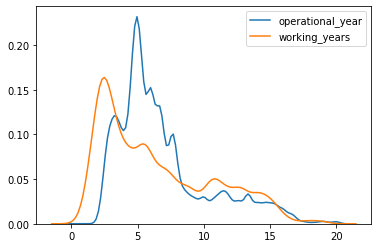

<Figure size 720x720 with 0 Axes>

In [0]:
sns.kdeplot(datos_train.operational_year)
sns.kdeplot(datos_train.working_years)
plt.figure(figsize=(10,10))

In [0]:
# rellenamos los missing values con type 'other' como parche
#datos_train.funder.fillna("other", inplace=True)
#datos_train["scheme_management"].fillna("other", inplace=True)
# datos_train["installer"].fillna("other", inplace=True)
print(datos_train.isnull().sum())
datos_train.drop('date_recorded', axis=1, inplace=True)
#datos_train.drop('construction_year', axis=1, inplace=True)


id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
population               0
scheme_management        0
construction_year        0
extraction_type          0
extraction_type_class    0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
source                   0
source_type              0
source_class             0
waterpoint_type          0
status_group             0
working_years            0
operational_year         0
dtype: int64


In [0]:
# rellenamos los missing values con type 'other' como parche
#datos_test.funder.fillna("other", inplace=True)
#datos_test["scheme_management"].fillna("other", inplace=True)
# datos_train["installer"].fillna("other", inplace=True)
print(datos_test.isnull().sum())
datos_test.drop('date_recorded', axis=1, inplace=True)
#datos_test.drop('construction_year', axis=1, inplace=True)

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
population               0
scheme_management        0
construction_year        0
extraction_type          0
extraction_type_class    0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
source                   0
source_type              0
source_class             0
waterpoint_type          0
working_years            0
operational_year         0
dtype: int64


In [0]:
# ahora vamos a corregir variables categoricas

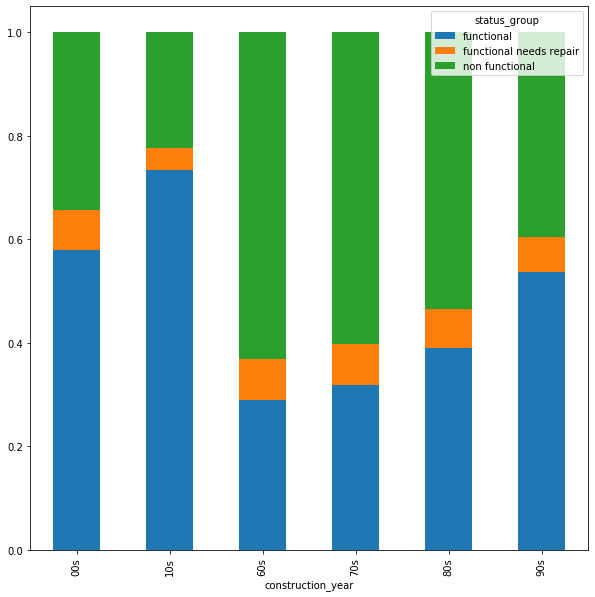

In [0]:
# este crosstab muestra las clases para la variable construction_year
tab = pd.crosstab(datos_train.construction_year, datos_train.status_group).apply(lambda r: r/r.sum(), axis=1)
tab[:].plot(kind='bar', stacked=True, figsize=(10,10))

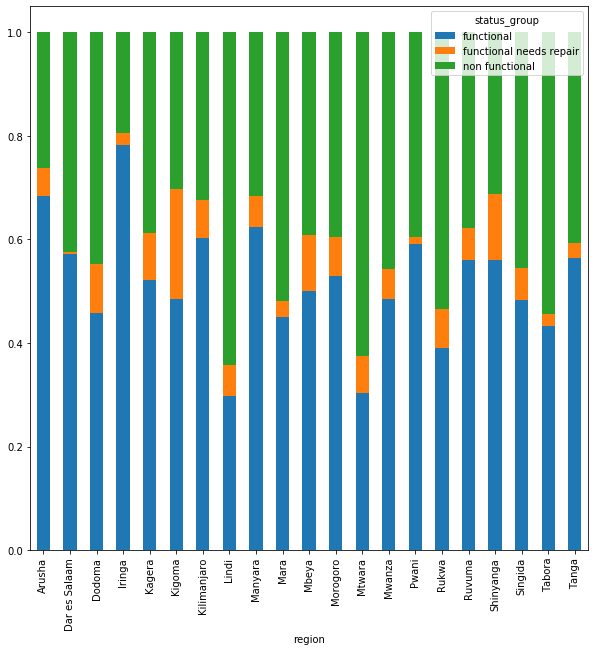

In [0]:
# este crosstab muestra las clases para la variable construction_year
tab = pd.crosstab(datos_train.region, datos_train.status_group).apply(lambda r: r/r.sum(), axis=1)
tab[:].plot(kind='bar', stacked=True, figsize=(10,10))

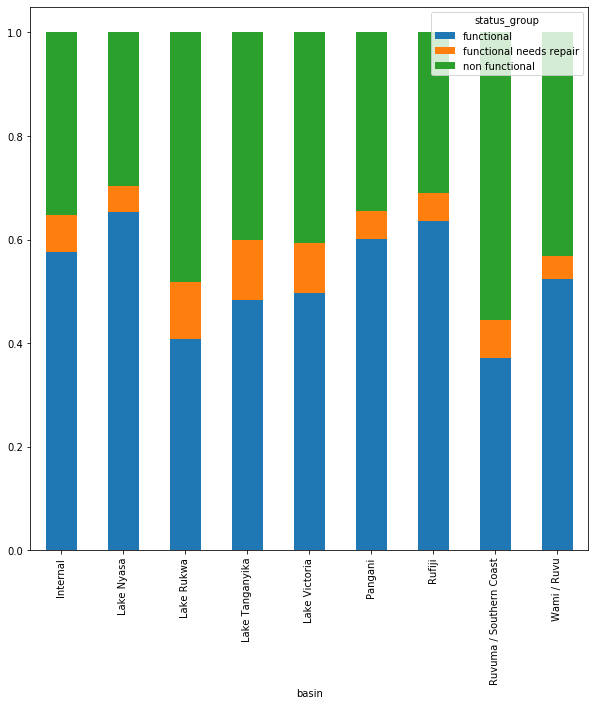

In [0]:
# este crosstab muestra las clases para la variable construction_year
tab = pd.crosstab(datos_train.basin, datos_train.status_group).apply(lambda r: r/r.sum(), axis=1)
tab[:].plot(kind='bar', stacked=True, figsize=(10,10))

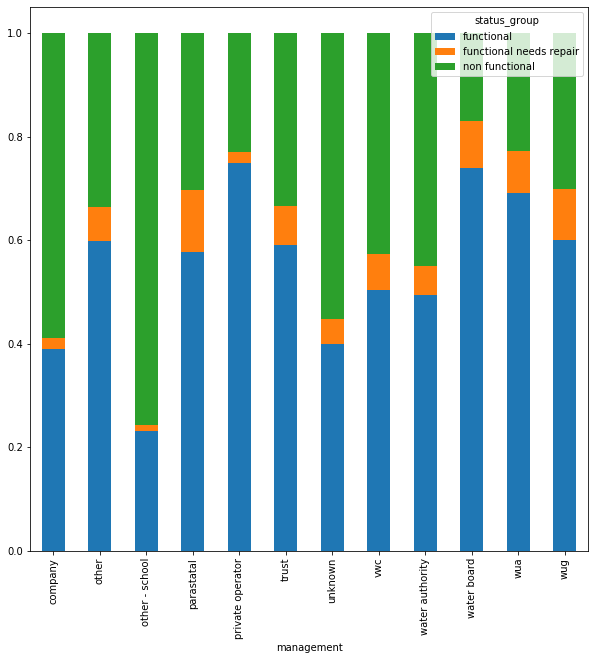

In [0]:
# este crosstab muestra las clases para la variable construction_year
tab = pd.crosstab(datos_train.management, datos_train.status_group).apply(lambda r: r/r.sum(), axis=1)
tab[:].plot(kind='bar', stacked=True, figsize=(10,10))

<Figure size 720x720 with 0 Axes>

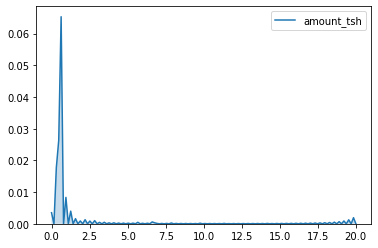

<Figure size 720x720 with 0 Axes>

In [0]:
sns.kdeplot(datos_train.amount_tsh, shade = True)
plt.figure(figsize=(10,10))

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


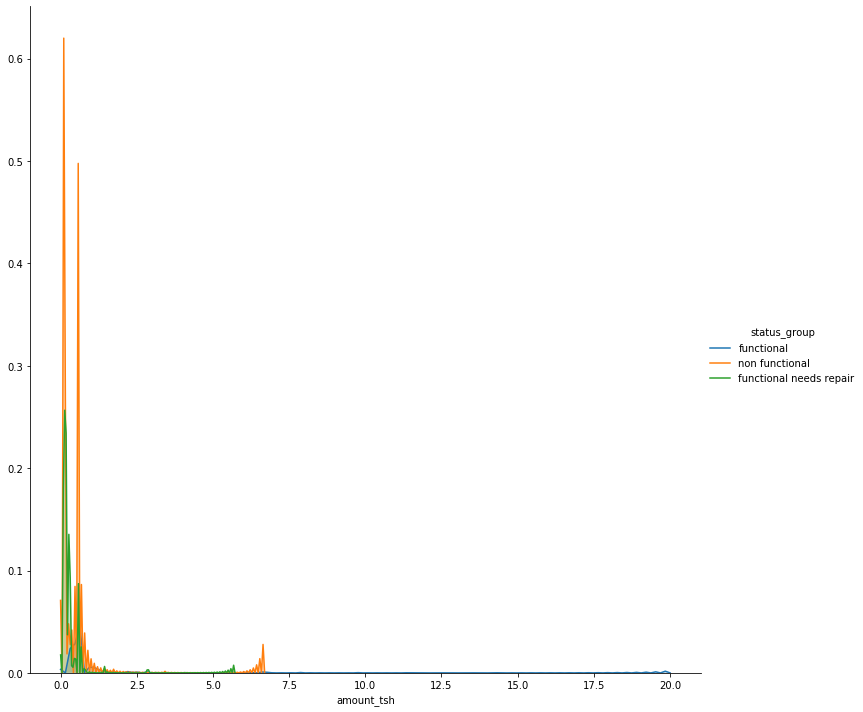

In [0]:
sns.FacetGrid(datos_train, 
             hue='status_group',size=10).map(sns.kdeplot, 'amount_tsh', shade=True).add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


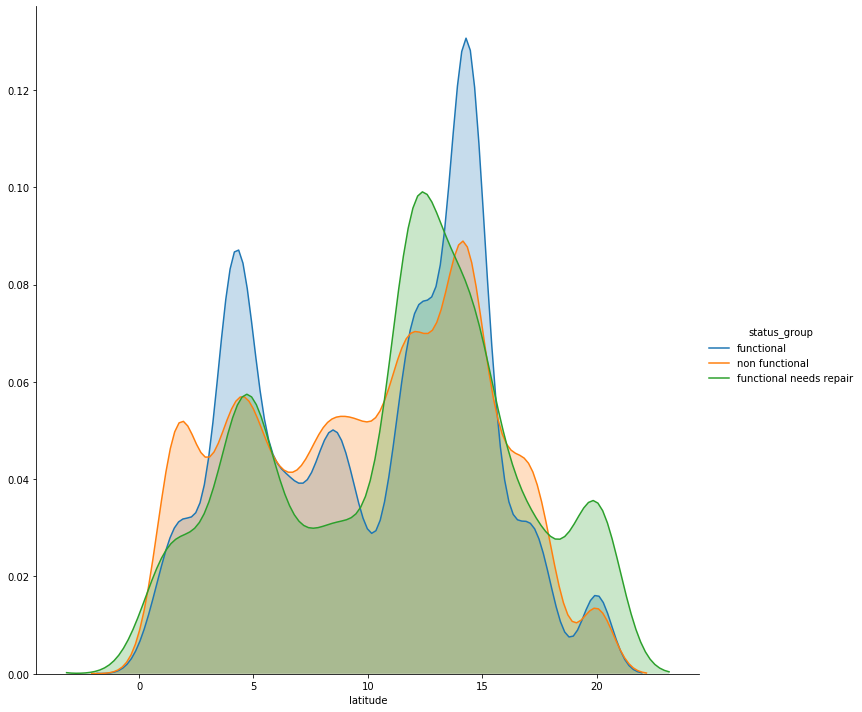

In [0]:
# vamos a sacar unos graficos de las variables espaciales
sns.FacetGrid(datos_train, 
             hue='status_group',size=10).map(sns.kdeplot, 'latitude', shade=True).add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


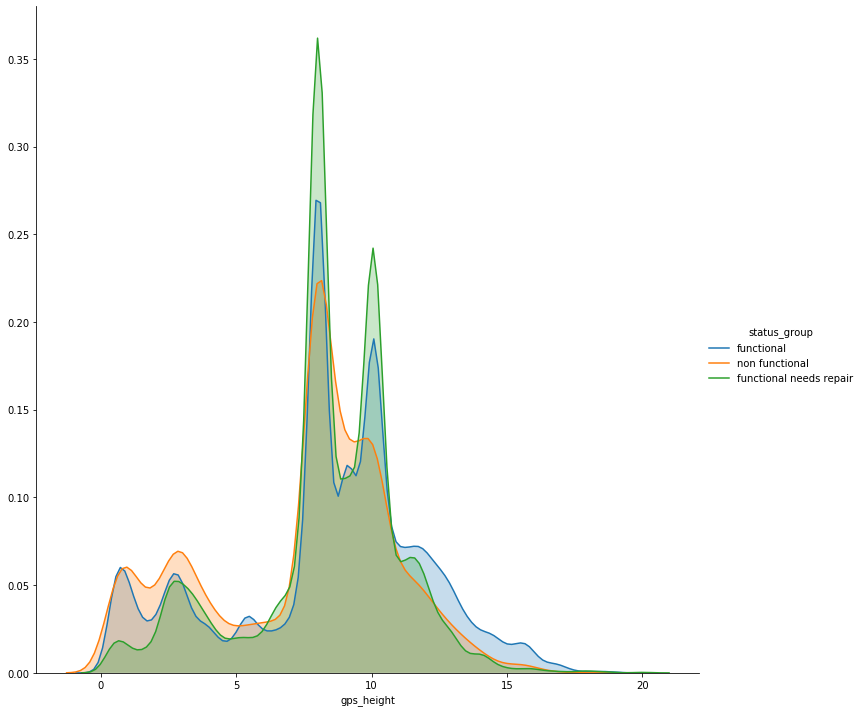

In [0]:
sns.FacetGrid(datos_train, 
             hue='status_group',size=10).map(sns.kdeplot, 'gps_height', shade=True).add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


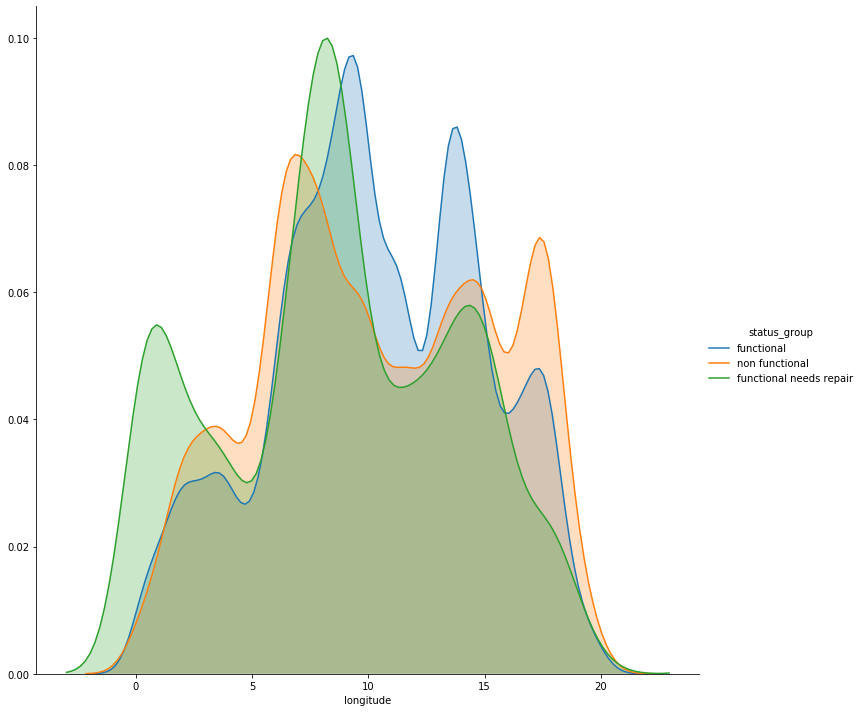

In [0]:
sns.FacetGrid(datos_train, 
             hue='status_group',size=10).map(sns.kdeplot, 'longitude', shade=True).add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


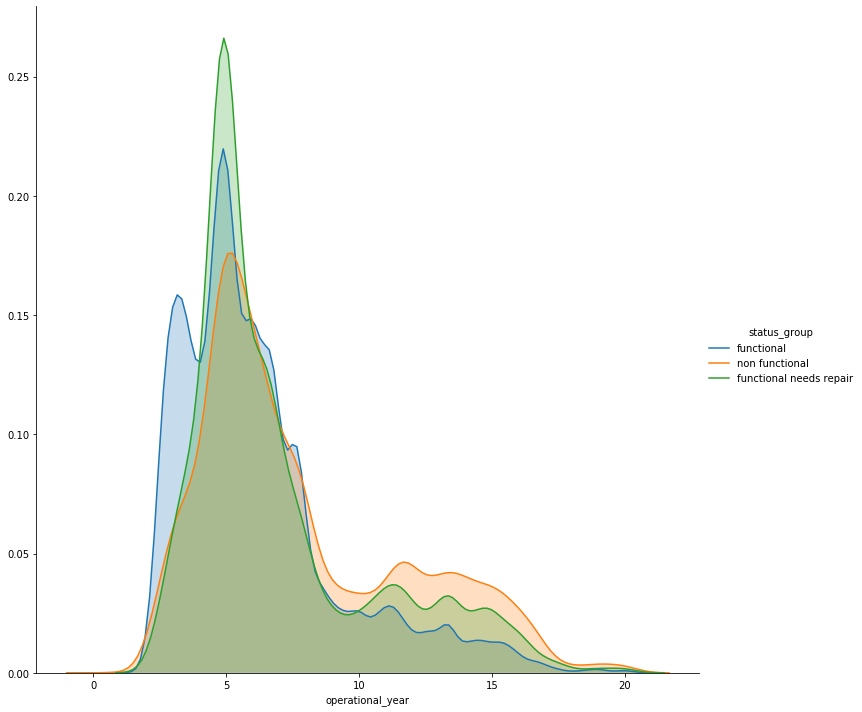

In [0]:
sns.FacetGrid(datos_train, 
             hue='status_group',size=10).map(sns.kdeplot, 'operational_year', shade=True).add_legend()

In [0]:
# guardamos el csv para correrlo en rstudio con rpart
camino = '/content/drive/My Drive/Master AI/Asignaturas/Mineria de Datos Preprocesamiento y Clasificacion/TrabajoFinal/'
pd.DataFrame(datos_train).to_csv(camino + "clean.csv")

In [0]:
# guardamos el csv para correrlo en rstudio con rpart
camino = '/content/drive/My Drive/Master AI/Asignaturas/Mineria de Datos Preprocesamiento y Clasificacion/TrabajoFinal/'
pd.DataFrame(datos_test).to_csv(camino + "clean_test.csv")

Text(0, 0.5, 'Porcentaje de acierto')

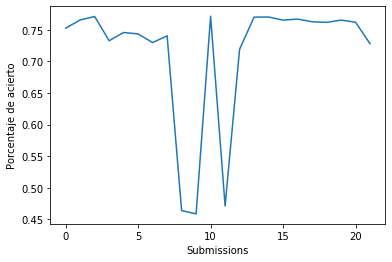

In [4]:
# grafico submissions
resultados = [0.7525, 0.7655, 0.7710, 0.7327, 0.7457, 0.7434, 0.7298, 0.7404, 0.4640, 0.4587, 0.7714, 0.4714, 
              0.7192, 0.7700, 0.7702, 0.7653, 0.7669, 0.7627, 0.7617, 0.7653, 0.7620, 0.7279]
plt.plot(resultados)
plt.xlabel('Submissions')
plt.ylabel('Porcentaje de acierto')